In [58]:
from lightkurve import search_targetpixelfile
import lightkurve as lk
tpf_crowded = lk.search_targetpixelfile("KIC 10593626", author="Kepler", cadence="long", quarter=7).download(quality_bitmask="hard")

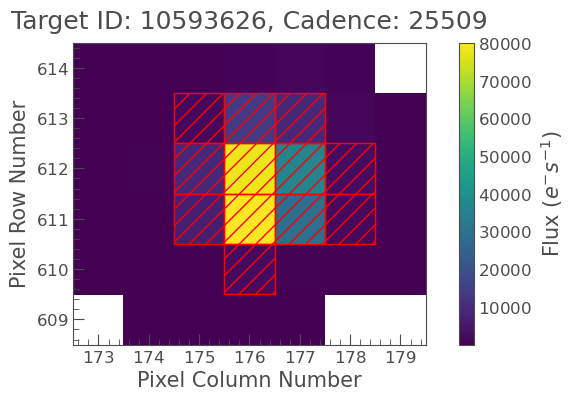

In [59]:
tpf_crowded.plot(aperture_mask='pipeline');

In [60]:
tpf_crowded.create_threshold_mask(threshold=1)

array([[False, False, False, False, False, False, False],
       [False, False, False,  True, False, False, False],
       [False, False,  True,  True,  True,  True, False],
       [False, False,  True,  True,  True,  True, False],
       [False, False,  True,  True,  True,  True, False],
       [False, False, False,  True,  True,  True, False]])

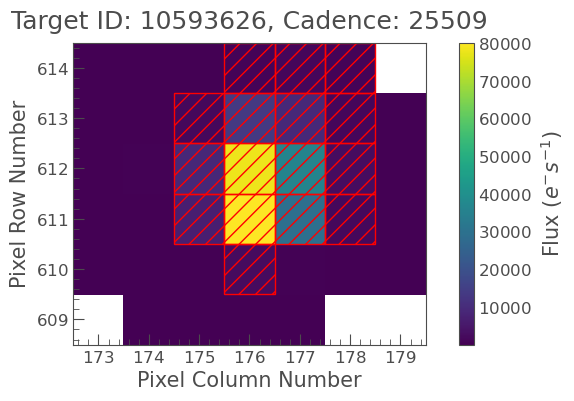

In [61]:
tpf_crowded.plot(aperture_mask=tpf_crowded.create_threshold_mask(threshold=1));

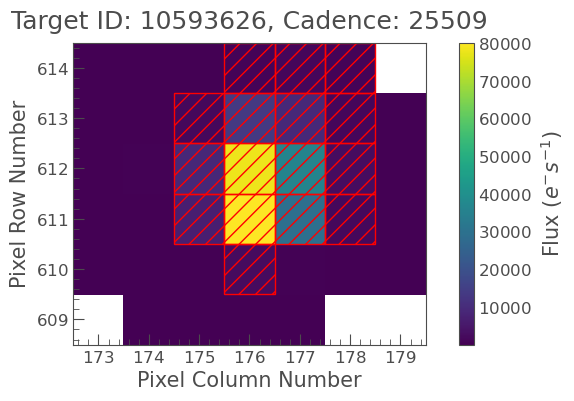

In [62]:
custom_mask = tpf_crowded.create_threshold_mask(threshold=1, reference_pixel=(0,0))
tpf_crowded.plot(aperture_mask=custom_mask);

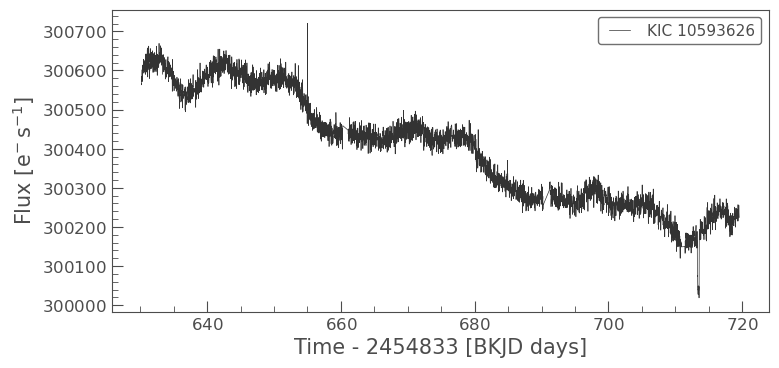

In [63]:
lc_background_star = tpf_crowded.to_lightcurve(aperture_mask=custom_mask)
lc_background_star.plot();

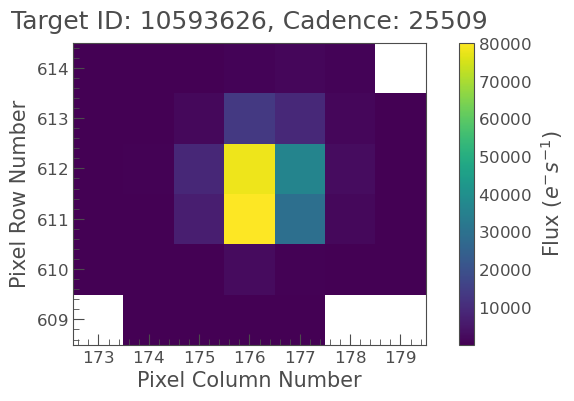

In [64]:
tpf_crowded.plot();

<AxesSubplot:title={'center':'Target ID: 10593626, Cadence: 25509'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

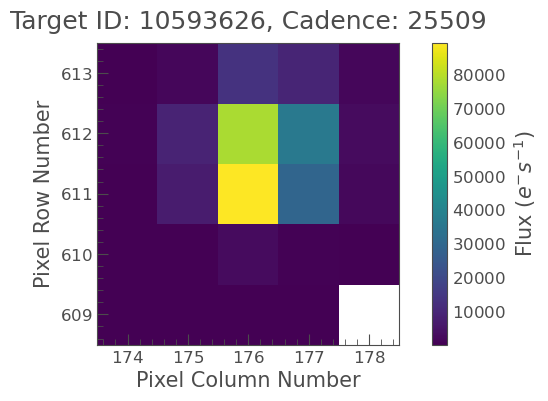

In [65]:
tpf_cut = tpf_crowded.cutout(center=(4,3))
tpf_cut.plot()

In [66]:
tpf_cut.create_threshold_mask(threshold=1)

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False,  True,  True, False]])

In [67]:
import numpy as np
cut_mask = np.zeros(tpf_cut[2].shape[1:3], dtype='bool')
cut_mask[2:4,2] = True
cut_mask[2:4,1] = True
cut_mask[2:4,3] = True

cut_mask

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False, False, False]])

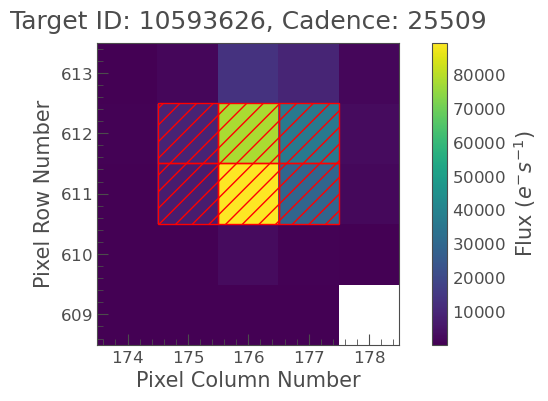

In [68]:
tpf_cut.plot(aperture_mask=cut_mask);

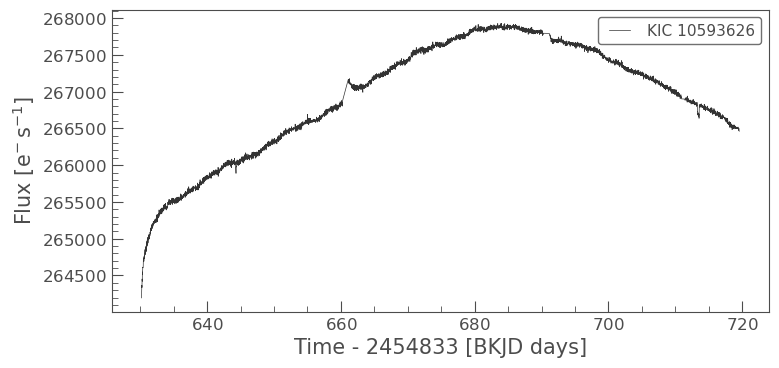

In [69]:
lc_background_star_cut = tpf_cut.to_lightcurve(aperture_mask=cut_mask)
lc_background_star_cut.plot();

In [70]:
search_result = lk.search_lightcurve("Kepler-22", author="Kepler", cadence="long")
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr010593626,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr010593626,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr010593626,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr010593626,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr010593626,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr010593626,0.0
6,Kepler Quarter 06,2010,Kepler,1800,kplr010593626,0.0
7,Kepler Quarter 07,2010,Kepler,1800,kplr010593626,0.0
8,Kepler Quarter 08,2011,Kepler,1800,kplr010593626,0.0


In [71]:
lc_collection = search_result.download_all()
lc_collection

LightCurveCollection of 18 objects:
    0: <KeplerLightCurve LABEL="KIC 10593626" QUARTER=0 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    1: <KeplerLightCurve LABEL="KIC 10593626" QUARTER=1 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    2: <KeplerLightCurve LABEL="KIC 10593626" QUARTER=2 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    3: <KeplerLightCurve LABEL="KIC 10593626" QUARTER=3 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    4: <KeplerLightCurve LABEL="KIC 10593626" QUARTER=4 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    5: <KeplerLightCurve LABEL="KIC 10593626" QUARTER=5 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    6: <KeplerLightCurve LABEL="KIC 10593626" QUARTER=6 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    7: <KeplerLightCurve LABEL="KIC 10593626" QUARTER=7 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    8: <KeplerLightCurve LABEL="KIC 10593626" QUARTER=8 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    9: <KeplerLightCurve LABEL="KIC 10593626" QUARTER=9 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    10: <Keple

In [72]:
lc_stitched = lc_collection.stitch()
lc_stitched

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
120.53900742435508,1.0000801e+00,4.8354697e-05,0,8.550044e-04,179.91579,615.85341,568,3.1178103e+05,1.5097328e+01,2.8354380e+03,1.3012959e+00,3.1230866e+05,1.5100382e+01,0,———,———,———,———,179.91579,6.9586677e-05,615.85341,5.4353437e-05,-1.4607409e-03,3.5337068e-03
120.55944174409524,9.9997437e-01,4.8534574e-05,0,8.557241e-04,179.91600,615.85347,569,3.1175097e+05,1.5096919e+01,2.8441611e+03,1.3040152e+00,3.1227566e+05,1.5156554e+01,0,———,———,———,———,179.91600,6.9587884e-05,615.85347,5.4360149e-05,-1.1929076e-03,3.6978703e-03
120.57987596383464,1.0000850e+00,4.8572474e-05,0,8.564438e-04,179.91604,615.85321,570,3.1177844e+05,1.5098232e+01,2.8446782e+03,1.3008099e+00,3.1231019e+05,1.5168389e+01,0,———,———,———,———,179.91604,6.9586698e-05,615.85321,5.4356773e-05,-1.0024284e-03,3.5327603e-03
120.60031038356829,9.9982530e-01,4.8263319e-05,10000000,8.571636e-04,179.91653,615.85324,571,3.1173134e+05,1.5096980e+01,2.8429888e+03,1.3055528e+00,3.1222909e+05,1.5071846e+01,10000000,———,———,———,———,179.91653,6.9590933e-05,615.85324,5.4356849e-05,-5.6158245e-04,3.3443142e-03
120.62074470325024,1.0000035e+00,4.8561029e-05,0,8.578832e-04,179.91669,615.85288,572,3.1176266e+05,1.5098287e+01,2.8425586e+03,1.3027847e+00,3.1228475e+05,1.5164816e+01,0,———,———,———,———,179.91669,6.9593836e-05,615.85288,5.4362863e-05,-2.9510944e-04,3.3509261e-03
120.64117892293143,9.9993354e-01,4.8336111e-05,0,8.586029e-04,179.91674,615.85278,573,3.1176109e+05,1.5097275e+01,2.8402161e+03,1.3063352e+00,3.1226291e+05,1.5094578e+01,0,———,———,———,———,179.91674,6.9586386e-05,615.85278,5.4350247e-05,-8.1684761e-05,2.9048885e-03
120.66161324260611,9.9991506e-01,4.8395952e-05,10000000,8.593226e-04,179.91680,615.85293,574,3.1174666e+05,1.5097007e+01,2.8430410e+03,1.3027490e+00,3.1225712e+05,1.5113265e+01,10000000,———,———,———,———,179.91680,6.9589340e-05,615.85293,5.4359112e-05,1.0091478e-04,3.1171264e-03
120.68204766223062,9.9997467e-01,4.8363574e-05,0,8.600422e-04,179.91684,615.85280,575,3.1177031e+05,1.5097208e+01,2.8382690e+03,1.3019427e+00,3.1227575e+05,1.5103154e+01,0,———,———,———,———,179.91684,6.9583992e-05,615.85280,5.4353870e-05,9.1682872e-05,2.9421994e-03


<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

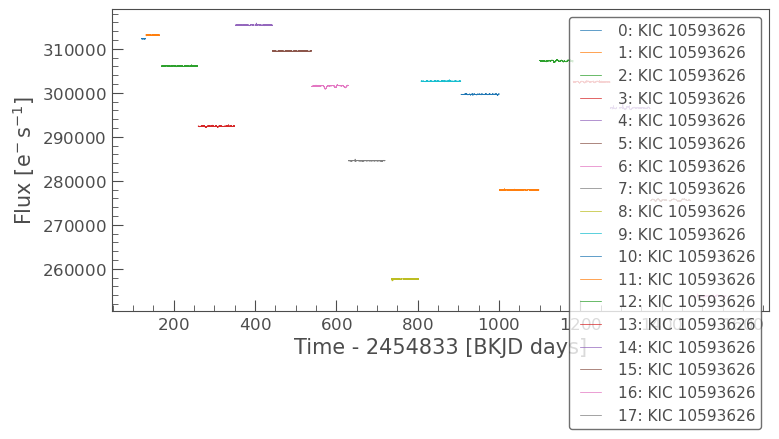

In [67]:
lc_collection.plot()

In [40]:
from lightkurve import search_targetpixelfile
import lightkurve as lk
tpf_crowded = lk.search_targetpixelfile("KIC 10593626", author="Kepler", cadence="long", quarter=1).download(quality_bitmask="hard")

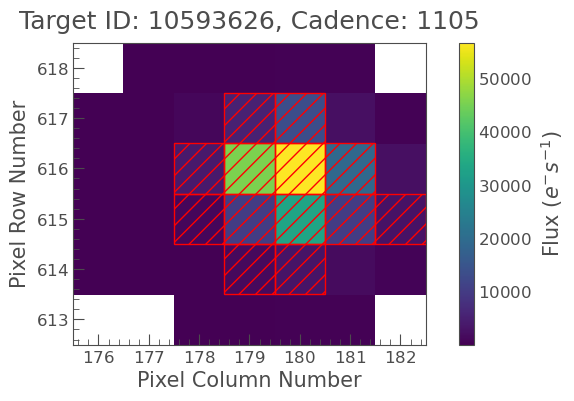

In [41]:
tpf_crowded.plot(aperture_mask='pipeline');

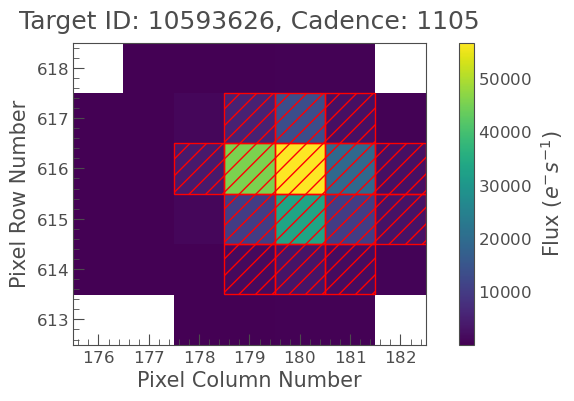

In [42]:
custom_mask = tpf_crowded.create_threshold_mask(threshold=1, reference_pixel=(0,0))
tpf_crowded.plot(aperture_mask=custom_mask);

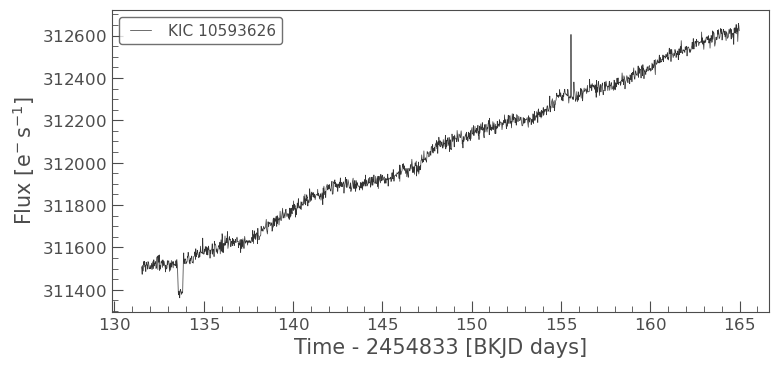

In [43]:
lc_background_star = tpf_crowded.to_lightcurve(aperture_mask=custom_mask)
lc_background_star.plot();

In [44]:
tpf_crowded.create_threshold_mask(threshold=1)

array([[False, False, False, False, False, False, False],
       [False, False, False,  True,  True,  True, False],
       [False, False, False,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True, False],
       [False, False, False, False, False, False, False]])

<AxesSubplot:title={'center':'Target ID: 10593626, Cadence: 1105'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

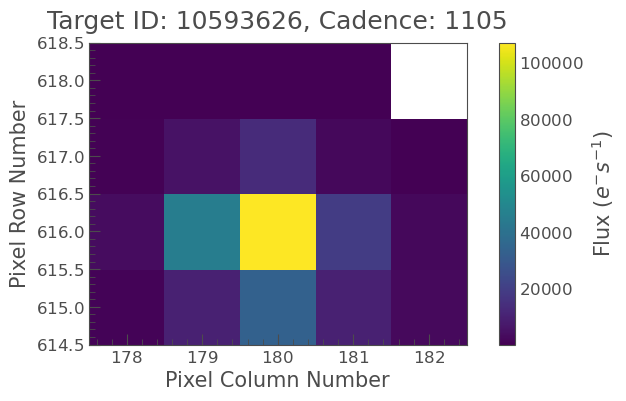

In [46]:
tpf_cut = tpf_crowded.cutout(center=(5,5))
tpf_cut.plot()

In [51]:
import numpy as np
cut_mask = np.zeros(tpf_cut[0].shape[1:3],dtype='bool')
cut_mask[0:3,1] = True
cut_mask[0:3,2] = True
cut_mask[0:3,3] = True

cut_mask

array([[False,  True,  True,  True, False],
       [False,  True,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False, False, False]])

<AxesSubplot:title={'center':'Target ID: 10593626, Cadence: 1105'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

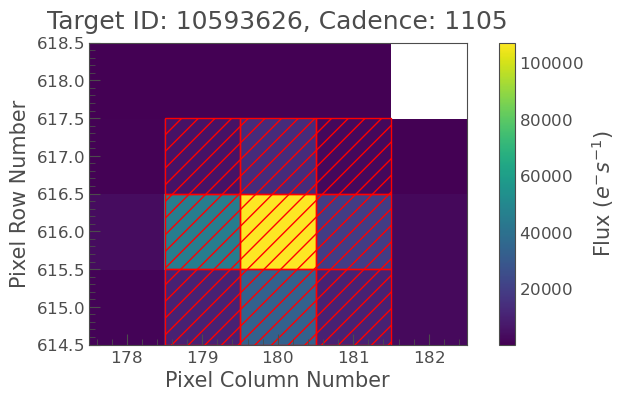

In [52]:
tpf_cut.plot(aperture_mask=cut_mask)

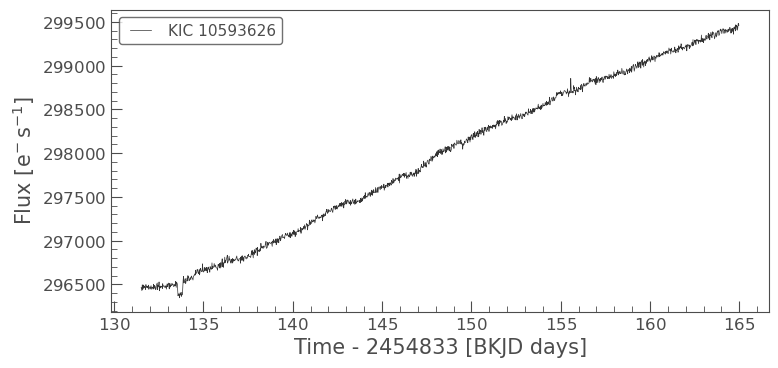

In [53]:
lc_background_star_cut = tpf_cut.to_lightcurve(aperture_mask=cut_mask)
lc_background_star_cut.plot();

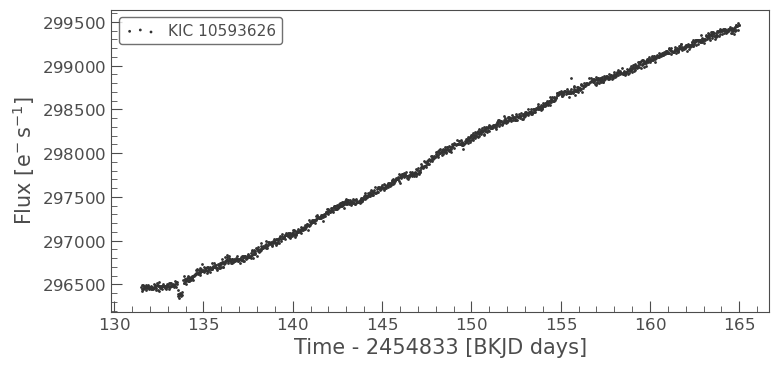

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axis import Axis
lc = lc_background_star_cut.remove_nans().remove_outliers()
lc.scatter();

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

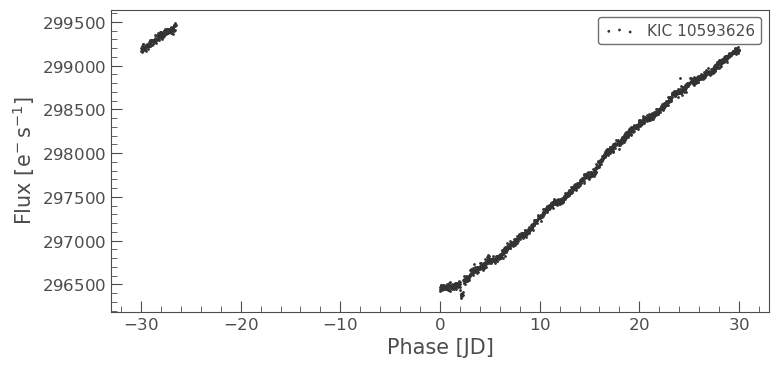

In [55]:
folded_lc = lc.fold(period=60)
folded_lc.scatter()